In [196]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as pl
import numpy as np
import pandas as pd
np.set_printoptions(precision=4)
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [197]:
wine=load_wine()

In [198]:
X=pd.DataFrame(wine.data,columns=wine.feature_names)
y=pd.Categorical.from_codes(wine.target,wine.target_names)

In [199]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [200]:
y

[class_0, class_0, class_0, class_0, class_0, ..., class_2, class_2, class_2, class_2, class_2]
Length: 178
Categories (3, object): [class_0, class_1, class_2]

In [201]:
X['class']=y

In [202]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,class_2


Linear Discriminant Analysis can be broken up into the following steps:
1. Compute the within class and between class scatter matrices
2. Compute the eigenvectors and corresponding eigenvalues for the 
    scatter matrices
3. Sort the eigenvalues and select the top k
4. Create a new matrix containing eigenvectors that map to the k eigenvalues
5. Obtain the new features (i.e. LDA components) by taking the dot product 
    of the data and the matrix from step 4

In [203]:
class_feature_means=X.groupby('class').mean().T
class_feature_means

class,class_0,class_1,class_2
alcohol,13.744746,12.278732,13.153750
malic_acid,2.010678,1.932676,3.333750
ash,2.455593,2.244789,2.437083
alcalinity_of_ash,17.037288,20.238028,21.416667
magnesium,106.338983,94.549296,99.312500
total_phenols,2.840169,2.258873,1.678750
flavanoids,2.982373,2.080845,0.781458
nonflavanoid_phenols,0.290000,0.363662,0.447500
proanthocyanins,1.899322,1.630282,1.153542
color_intensity,5.528305,3.086620,7.396250


In [204]:
within_class_scatter_matrix=np.zeros((13,13))
for c,row in X.groupby('class'):
    rows=row.drop(['class'],axis=1)
    s=np.zeros((13,13))
    for index,row in rows.iterrows():
        x,mc=row.values.reshape(13,1),class_feature_means[c].values.reshape(13,1)
        s+=(x-mc).dot((x-mc).T)
    within_class_scatter_matrix+=s

In [205]:
feature_means=X.mean()
feature_means

alcohol                          13.000618
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.361854
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
dtype: float64

In [206]:
between_class_scatter_matrix=np.zeros((13,13))
for c in class_feature_means:
    n=len(X.loc[X['class']==c].index)
    mc,m=class_feature_means[c].values.reshape(13,1),feature_means.values.reshape(13,1)
    between_class_scatter_matrix+=n*(mc-m).dot((mc-m).T)

In [207]:
eigenvalue,eigenvector=np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).
                                    dot(between_class_scatter_matrix))

In [208]:
eigenvalue

array([-8.8818e-16+0.0000e+00j,  4.1285e+00+0.0000e+00j,
        9.0817e+00+0.0000e+00j, -1.7346e-16+7.2139e-16j,
       -1.7346e-16-7.2139e-16j,  6.5214e-16+8.0592e-17j,
        6.5214e-16-8.0592e-17j, -2.6641e-16+1.1555e-16j,
       -2.6641e-16-1.1555e-16j, -2.5853e-16+0.0000e+00j,
        4.8695e-17+0.0000e+00j, -2.8148e-17+5.4411e-17j,
       -2.8148e-17-5.4411e-17j])

In [209]:
pairs=[(np.abs(eigenvalue[i]),eigenvector[:,i]) for i in range(len(eigenvalue))]
pairs=sorted(pairs,key=lambda x: x[0],reverse=True)

In [210]:
for pair in pairs:
    print(pair[0])

9.081739435042472
4.128469045639484
8.881784197001252e-16
7.41949604398113e-16
7.41949604398113e-16
6.57104310784389e-16
6.57104310784389e-16
2.9039090283069212e-16
2.9039090283069212e-16
2.58525572226227e-16
6.126103277916086e-17
6.126103277916086e-17
4.86945776983596e-17


In [211]:
eig_val_sum=sum(eigenvalue)

In [212]:
for i,pair in enumerate(pairs):
    print("Eignvector{}: {}".format(i,(pair[0]/eig_val_sum).real))

Eignvector0: 0.6874788878860784
Eignvector1: 0.31252111211392164
Eignvector2: 6.723424698398662e-17
Eignvector3: 5.616486715430028e-17
Eignvector4: 5.616486715430028e-17
Eignvector5: 4.9742160522698054e-17
Eignvector6: 4.9742160522698054e-17
Eignvector7: 2.1982310366664338e-17
Eignvector8: 2.1982310366664338e-17
Eignvector9: 1.957013567229342e-17
Eignvector10: 4.637400906181487e-18
Eignvector11: 4.637400906181487e-18
Eignvector12: 3.686132415666904e-18


In [213]:
w_matrix=np.hstack((pairs[0][1].reshape(13,1),pairs[1][1].reshape(13,1))).real

In [214]:
w_matrix

array([[-1.4368e-01, -2.5445e-01],
       [ 5.8860e-02, -8.9130e-02],
       [-1.3146e-01, -6.8467e-01],
       [ 5.5136e-02,  4.2724e-02],
       [-7.7060e-04,  1.3506e-04],
       [ 2.2014e-01,  9.4018e-03],
       [-5.9168e-01,  1.4360e-01],
       [-5.3278e-01,  4.7602e-01],
       [ 4.7761e-02,  8.9628e-02],
       [ 1.2646e-01, -7.3909e-02],
       [-2.9137e-01,  4.4236e-01],
       [-4.1230e-01, -1.4939e-02],
       [-9.5856e-04, -8.3269e-04]])

In [215]:
X_lda=np.array(X.iloc[:,:13].dot(w_matrix))

In [216]:
le=LabelEncoder()
y=le.fit_transform(X['class'])

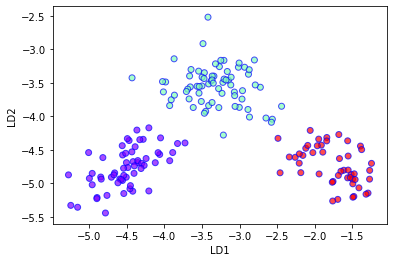

In [217]:
pl.xlabel('LD1')
pl.ylabel('LD2')
pl.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [218]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

In [219]:
X=X.iloc[:,:13].values

In [220]:
pca=PCA(n_components=2)
pca.fit(X)
transformed_pca=pca.transform(X)

In [221]:
svd=TruncatedSVD(n_components=2)
svd.fit(X)
transformed_svd=svd.transform(X)

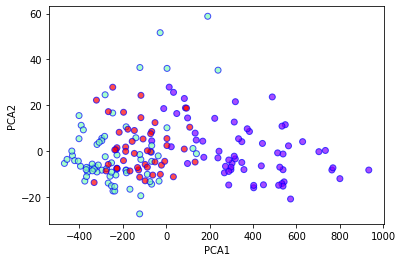

In [222]:
pl.xlabel('PCA1')
pl.ylabel('PCA2')
pl.scatter(
    transformed_pca[:,0],
    transformed_pca[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

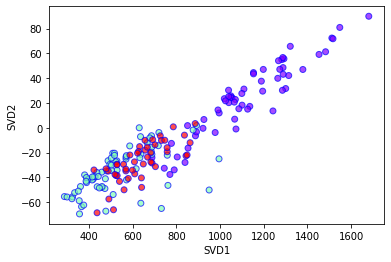

In [223]:
pl.xlabel('SVD1')
pl.ylabel('SVD2')
pl.scatter(
    transformed_svd[:,0],
    transformed_svd[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [224]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis(n_components=2)

In [226]:
X_l=lda.fit_transform(X,y)

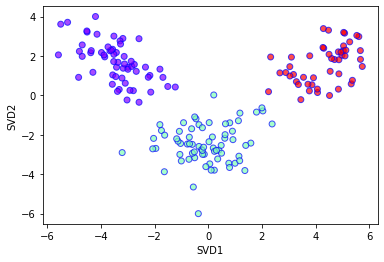

In [228]:
pl.xlabel('SVD1')
pl.ylabel('SVD2')
pl.scatter(
    X_l[:,0],
    X_l[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)